In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
import os

In [3]:
os. getcwd()

'C:\\Users\\Sravani\\OneDrive\\Desktop\\Face recognition'

In [4]:
# Load HAAR face classifier
#face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './Images/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

# RUN BELOW ONLY TO COLLECT THE DATA

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

W0606 19:52:22.097210  9076 deprecation_wrapper.py:119] From C:\Users\Sravani\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

W0606 19:52:23.782308  9076 deprecation_wrapper.py:119] From C:\Users\Sravani\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/5
24/25 [===========================>..] - ETA: 19s - loss: 0.3330 - accuracy: 0.9076

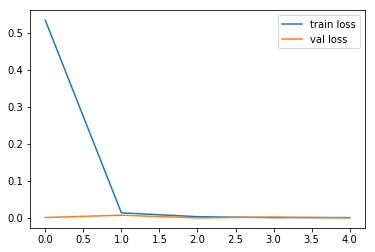

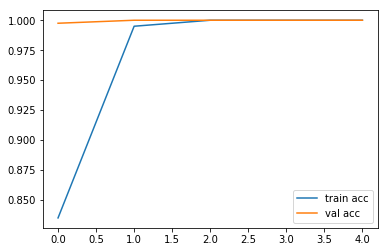

<Figure size 432x288 with 0 Axes>

In [12]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [ ]:
# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np

from keras.preprocessing import image
model = load_model('facefeatures_new_model.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[:,0]>0.5):
            name='Amma'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    elif(pred[:,1]>0.2):
        name='Sarma'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    elif(pred[:,2]>0.5):
        name='Sravani'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    elif(pred[:,3]>0.5):
        name='Sravanipvn'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

[[1.6172096e-36 1.6895038e-34 0.0000000e+00 1.0000000e+00]]
[[1.2943529e-30 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[3.1515369e-26 4.0668165e-34 0.0000000e+00 1.0000000e+00]]
[[7.029862e-33 0.000000e+00 0.000000e+00 1.000000e+00]]
[[0. 0. 0. 1.]]
[[8.8044685e-36 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[3.6153605e-28 5.0874831e-34 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[5.8749755e-31 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[4.899975e-29 0.000000e+00 0.000000e+00 1.000000e+00]]
[[1.4648215e-29 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[2.0460005e-34 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[1.8416203e-29 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[4.5808493e-31 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[6.487438e-33 0.000000e+00 0.000000e+00 1.000000e+00]]
[[7.101982e-28 0.000000e+00 0.000000e+00

[[2.0999416e-29 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[7.689333e-28 0.000000e+00 0.000000e+00 1.000000e+00]]
[[0. 0. 0. 1.]]
[[1.0256064e-37 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[1.2381813e-27 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[2.9097597e-28 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[1.9356798e-28 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[9.197763e-29 0.000000e+00 0.000000e+00 1.000000e+00]]
[[7.724173e-20 0.000000e+00 0.000000e+00 1.000000e+00]]
[[1.3131674e-22 9.6819881e-38 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[1.5355403e-38 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[8.906545e-38 0.000000e+00 0.000000e+00 1.000000e+00]]
[[1.2905033e-36 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[6.4365368e-04 2.5136994e-34 6.1456739e-35 9.9935633e-01]]
[[0. 0. 0. 1.]]
[[4.3311145e-36 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [15]:
pred[:,1]

array([0.], dtype=float32)